<img src="school_logo.png" alt="Alt text" width="600">

# Metrics to assess the performance a gravitational wave detector

Here are some examples of plots that one can usually find in a paper about Einstein Telescope. These are taken from the CoBA study ([Branchesi et al.](https://iopscience.iop.org/article/10.1088/1475-7516/2023/07/068)):

<img src="horizon.png" alt="Alt text" width="600">

<img src="pe_example.png" alt="Alt text" width="600">

**`How are these plots produced?`**

In the following notebook, we will present some quick metrics to evaluate the performance of a gravitational wave (GW) detector. These are either based on the **`signal-to-noise ratio (SNR)`** evaluation or rely on the **`Fisher matrix`** approximation. The notebook can be run in Google Colab or locally: in both cases the guidelines for the settings are provided below. 

There is a set of Fisher matrix - based softwares available to the GW community that provide us with all the useful functions. These are:

- `GWFish` ([paper](https://www.sciencedirect.com/science/article/abs/pii/S2213133722000853)),
-  `gwbench` ([paper](https://iopscience.iop.org/article/10.1088/1361-6382/ac1618)), 
- `gwfast` ([paper1](https://iopscience.iop.org/article/10.3847/1538-4365/ac9129), [paper2](https://iopscience.iop.org/article/10.3847/1538-4357/ac9cd4)), 
- `TiDoFM` ([paper1](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.97.123014), [paper 2](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.105.043010)), 
- `GWJulia` ([paper](https://arxiv.org/abs/2506.21530)) 

These have developed primarily for the next-generation GW detectors, like the Einstein Telescope (ET) and the Cosmic Explorer (CE), forecasts. They all have been cross-checked inside the Einstein Telescope Collaboration (Division 9) and there is a dedicated chapter (chapter 9) about the softwares and their properties in the Blue Book ([paper](https://arxiv.org/abs/2503.12263)).

All the functions presented here are illustrating the functionalities of the `GWFish` software

### GW parameters
The parameters describind a GW event are the following (they are already provided with the same nomenclature as used in the code):
- `chirp_mass`: chirp mass of the binary in [Msol] (in detector frame)
- `mass_ratio`: ratio of the secondary mass over the primary mass, so that it ranges in $[0,1]$
- `redshift`: the redshift of the merger
- `luminosity_distance`:  the luminosity distance of the merger in [Mpc]
- `theta_jn`: the angle between the line of observation and the total angular momentum (orbital, spin and GR corrections) of the binary [rad] (it reduces to the so-called inclination angle or iota if the spin component is absent); it ranges in $[0, \pi]$
- `dec`: declination angle in [rad], it varies in $[-\pi/2, +\pi/2]$
- `ra`: right ascension in [rad], it varies in $[0, 2/pi]$
- `psi`: the polarization angle in [rad]; it ranges in $[0, \pi]$
- `phase`: the initial phase of the merger in [rad]; it ranges in $[0, 2\pi]$
- `geocent_time`: merger time as GPS time in [s]; it starts from 1980
- `a_1`: dimensionless spin parameter of primary component; it ranges in $[0, 1]$
- `a_2`: dimensionless spin parameter of secondary component; it ranges in $[0, 1]$
- `tilt_1`: zenith angle between the spin and orbital angular momenta for the primary component in [rad]; it ranges in $[0, \pi]$
- `tilt_2`: zenith angle between the spin and orbital angular momenta for the secondary component in [rad]; it ranges in $[0, \pi]$
- `phi_12`: difference between total and orbital angular momentum azimuthal angles in [rad]; it ranges in $[0, 2\pi]$
- `phi_jl`: difference between the azimuthal angles of the individual spin vector projections on to the orbital plane in [rad]; it ranges in $[0, 2\pi]$
- `lambda_1`: dimensionless tidal polarizabilty of primary component
- `lambda_2`: dimensionless tidal polarizabilty of secondary component

The `lambda_1` and `lambda_2` parameters are for neutron stars only and their value spans from a few hundreds to a thousand.


If $m_1$ and $m_2$ are the individual masses, then the chrip mass is defined as
$$ {\mathscr{M}}_{\rm chirp} = \frac{\left(m_1 m_2\right)^{3/5}}{\left(m_1 + m_2\right)^{1/5}} $$

These parameters divide into:
- **intrinsic parameters**: masses,  spins (these have six different components), tidal deformability parameters
- **extrinsic parameters**: location with respect to the detector, i.e. the sky position represented by the `ra` and `dec` parameters,  distance, merger time, orbital plane orientation

<img src="ra_dec.png" alt="Alt text" width="308">

<img src="spins.png" alt="Alt text" width="300">


### GW signal
The two polarizations of a GW signal can be written in frequency domain as:
$$
\begin{aligned}
    \tilde{h}_+ (f) &= \mathscr{A}(f, d_L, \mathscr{M})\exp(i\psi(f,\mathscr{M})) \left[\frac{1+\cos^2(\iota)}{2} \right]\\ 
    \tilde{h}_{\times}(f) &=\mathscr{A}(f, d_L, \mathscr{M})\exp(\frac{\pi}{2}+ i\psi(f,\mathscr{M})) \left[\cos(\iota) \right]
\end{aligned}
$$
where the amplitude is given by:
$$
\mathscr{A}(f, d_L, \mathscr{M}) \propto \frac{1}{d_L} \frac{(G \mathscr{M})^{5/6}}{f^{7/6}}
$$
and the phase is the following:
$$
\psi(f,\mathscr{M}) = 2\pi f t_c -\frac{\pi}{4} +\frac{3}{128}\left(\frac{\pi G\mathscr{M}}{c^3}\right)^{-5/3} \frac{1}{f^{5/3}}
$$

- One of the main effects of the Universe’s expansion is that it changes the way we measure the masses of gravitational wave sources. What we actually detect are the detector-frame masses, which are the source masses multiplied by $(1+z)$ due to redshift. This means we can’t tell the redshift and source mass apart just from the signal — they’re mixed together. So, a heavy system nearby can look a lot like a lighter system that’s farther away.

- Another important kind of degeneracy shows up between the luminosity distance $d_L$ and the inclination angle $\iota$, asthe amplitude of the signal we observe depends on both of these parameters. If a source is **face-on** — meaning $\iota = 0^\circ$ or $180^\circ$ — it appears louder, because it emits gravitational waves more strongly in our direction. On the other hand, **edge-on** systems (with $\iota = 90^\circ$) appear fainter. This leads to a trade-off: a nearby but edge-on source can look very similar to a more distant face-on one. 


The signal we see at the detector depends on the position of the detector itself, so we have to take into consideration the so-called antenna pattern functions:
$$
\tilde{h}(f) = \tilde{h}_{+}(f)F_{+} + \tilde{h}_{\times}(f)F_{\times}
$$
$\tilde{h}(f)$ represents the GW signal projected onto the detector.

#### **Note on mass conventions**
In `GWFish` the input masses can be passed in the following different combinations (the combination has to be the same when selecting the `fisher_params`):
- `chirp_mass` (in detector-frame and in [Msol]) and `mass_ratio` 
- `chirp_mass_source` (in source-frame and in [Msol]) and `mass_ratio`
- `mass_1` and `mass_2`, both in detector-frame and in [Msol]
- `mass_1_source` and `mass_2_source`, both in source-frame and in [Msol]

Pay attention that when masses are passed to `lal` they are **always** converted into `mass_1` and `mass_2` (in [kg]), as `lal` always takes masses in **detector frame**!


# SNR Calculation

When a GW signal is present in the detector, its output can be written as:
$$ s(t) = h_0(t)+n(t)$$
where $h_0(t)$ is the true signal and $n(t)$ the detector noise, which we assume to be Gaussian and stationary, with zero mean. The statistical properties of the noise are summarized by the power spectral density (PSD):
$$ \langle \tilde{n}(f) \tilde{n}(f') \rangle = \frac{1}{2} \delta(f-f') S_n(f)$$
where we put the $\sim$ to highlight the Fourier transform from time to frequency domain.


The method we use to extract a GW signal out of noisy detector data is called **matched filtering**. The idea is to compare the detector output to a bank of template waveforms and look for the one that matches best — in other words, the one that **maximizes the signal-to-noise ratio (SNR)**.

Matched filtering works by computing an overlap between the data and a filter function. This is done through a linear operation:

$$
    S = \int_{-\infty}^{+\infty} df\, \tilde{h}(f)\, \tilde{K}^*(f),
$$

where $\tilde{h}(f)$ is the Fourier transform of the template waveform, and $\tilde{K}^*(f)$ is the complex conjugate of the filter function.

If no real signal is present in the data, we only have noise. The expected noise contribution to the output is:

$$
    N^2 = \int_{-\infty}^{+\infty} df\, \frac{1}{2} S_n(f)\, |\tilde{K}(f)|^2,
$$

where $S_n(f)$ is the **noise power spectral density** — it tells us how sensitive the detector is across different frequencies.

Given a template waveform $h(t)$, the goal is to choose a filter that maximizes the SNR. This turns out to be:

$$
    \frac{S}{N} = \frac{\langle u | h \rangle}{\sqrt{\langle u | u \rangle}},
$$

where $u(t)$ is a function defined such that its Fourier transform is:

$$
    \tilde{u}(f) = \frac{1}{2} S_n(f)\, \tilde{K}(f).
$$

The inner product between two functions is defined as:

$$
    \langle a | b \rangle \equiv 4 \, \text{Re} \int_{f_{\rm min}}^{f_{\rm max}} df\, \frac{\tilde{a}(f)\, \tilde{b}^*(f)}{S_n(f)},
$$

where $f_{\rm min}$ and $f_{\rm max}$ define the frequency band over which the signal is analyzed.

To get the **optimal matched filter**, we choose:

$$
    \tilde{K}(f) \propto \frac{\tilde{h}(f)}{S_n(f)}.
$$

This choice gives us the **maximum possible SNR** for that template:

$$
    \left(\frac{S}{N}\right)_{\rm opt} = \sqrt{\langle h | h \rangle}.
$$

A gravitational wave signal is considered **detectable** if its SNR exceeds a certain threshold — typically set around $SNR \sim 8$.



# Let's start!

### 1. Settings for Google Colab
In Google Colab you do not need to download anything locally, and can work online. The only requirement is to have a Google account. Once you have opened this tutorial in Google Colab, **`uncomment the following lines`**:

In [1]:
#! pip install -q git+https://github.com/janosch314/GWFish.git
#! pip install -q lalsuite
#! pip install -q corner

**Note**: in Google Colab you might need to **restart the kernel runtime** after installation: `runtime -> restart session`

### 2. Settings for a local conda environment

#### Install GWFish in a `conda` environment

1. It is advisable to create a `conda` environment where to make the GWFish modules available (pay attention to the required python version):
    ```
    conda create --name gwfish_env python=3.9
    conda activate gwfish_env
    ```

2. To make GWFish modules available from any location in your PC, after clonig the repository
    ```
    git clone git@github.com:janosch314/GWFish.git
    ```
    from the folder location, and after activating the `conda` environment, execute the command
    ```
    pip install .
    ```

    Or you can simply directly proceed with:
    ```
    pip install git+https://github.com/janosch314/GWFish.git
    ```
    without cloning the repository.

3. You need to install the `LALSimulation` package to get access to its waveform approximants:
    ```
    pip install lalsuite
    ```

### Import packages

In [2]:
# suppress warning outputs for using lal in jupuyter notebook
import warnings 
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import GWFish.modules as gw
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import corner
import numpy as np
import pandas as pd
import json
import os
from astropy.cosmology import Planck18

### Single Event Analysis: GW170817-like

In [3]:
# Event's parameters should be passed as Pandas dataframe

parameters = {
    'chirp_mass': np.array([1.1858999987203738]) * (1 + 0.00980), 
    'mass_ratio': np.array([0.8308538032620448]), 
    'luminosity_distance': Planck18.luminosity_distance(0.00980).value,
    'theta_jn': np.array([2.545065595974997]),
    'ra': np.array([3.4461599999999994]),
    'dec': np.array([-0.4080839999999999]),
    'psi': np.array([0.]),
    'phase': np.array([0.]),
    'geocent_time': np.array([1187008882.4]),
    'a_1':np.array([0.005136138323169717]), 
    'a_2':np.array([0.003235146993487445]), 
    'lambda_1':np.array([368.17802383555687]), 
    'lambda_2':np.array([586.5487031450857])}
parameters = pd.DataFrame(parameters)
parameters

,chirp_mass,mass_ratio,luminosity_distance,theta_jn,ra,dec,psi,phase,geocent_time,a_1,a_2,lambda_1,lambda_2
0,1.197522,0.830854,43.747554,2.545066,3.44616,-0.408084,0.0,0.0,1.187009e+09,0.005136,0.003235,368.178024,586.548703


In [4]:
# We choose a waveform approximant suitable for BNS analysis
# In this case we are taking into account tidal polarizability effects
waveform_model = 'IMRPhenomD_NRTidalv2'
f_ref = 10.

### ⚠️ Note:
> The default reference frequency `f_ref` is set to $50$, the user can pass a different value, together with the `waveform_model` parameter (see examples below)


### Let's play with the signal

In [5]:
# To access the available detectors, use the following command
gw.utilities.get_available_detectors()

dict_keys(['ET', 'VOY', 'CE1', 'CE2', 'LLO', 'LHO', 'VIR', 'VIR_O2', 'KAG', 'LIN', 'LISA', 'LGWA', 'LGWA_Nb', 'LGWA_Soundcheck'])

#### A quick note on detectors setup

Detectors are all described in the ```.yaml``` file. The general settings are as follows (in case you want to customize your own detector):

```
ET: # name label of the detector
            lat:              (40 + 31. / 60 ) * np.pi / 180.
            lon:              (9 + 25. / 60) * np.pi / 180.
            opening_angle:    np.pi / 3.
            azimuth:          70.5674 * np.pi / 180.
            psd_data:         ET_psd.txt # file containg two columns: frequency, psd
            duty_factor:      0.85
            detector_class:   earthDelta # for triangle-shaped detector or earthL if usual-shape detector
            plotrange:        3, 1000, 1e-25, 1e-20
            fmin:             2. # minimum frequency of the detector
            fmax:             2048. # maximum frequency of the detector
            spacing:          geometric
            df:               1./16.
            npoints:          1000
            arm_length:       10000   
```

The ```spacing``` variable can either be ```geometric``` (logarithmic spacing of the frequency vector for waveform evaluation with a number of points specified by the ```npoints``` variable, faster solution) or ```linear``` (linear spacing of the frequency vector to evaluate the waveform with spacing given by ```df```, slower solution)

### Plot the signal
Let's start getting a feeling of how the signal appears

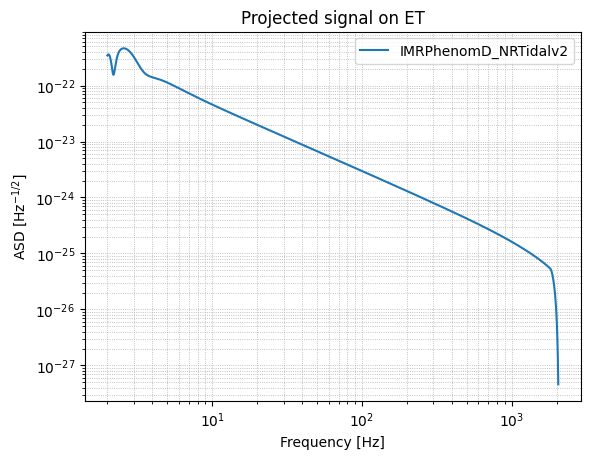

In [6]:
# Choose the detector onto which you want to project the signal
detector = 'ET'

# The following function outputs the signal projected onto the chosen detector
signal, _ = gw.utilities.get_fd_signal(parameters, detector, waveform_model, f_ref) # waveform_model and f_ref are passed together
frequency = gw.detection.Detector(detector).frequencyvector[:, 0]
# This signal has three components since ET comprises three detectors, let's plot one of them
plt.loglog(frequency, np.abs(signal[:, 0]), label='%s' %waveform_model)
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('ASD [Hz$^{-1/2}$]')
plt.grid(linestyle='dotted', linewidth='0.6', which='both')
plt.title('Projected signal on %s' %detector)
plt.show()

/var/folders/v7/nz73c0sd1r3610zffg1d_w980000gq/T/ipykernel_77095/3760963323.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e3)


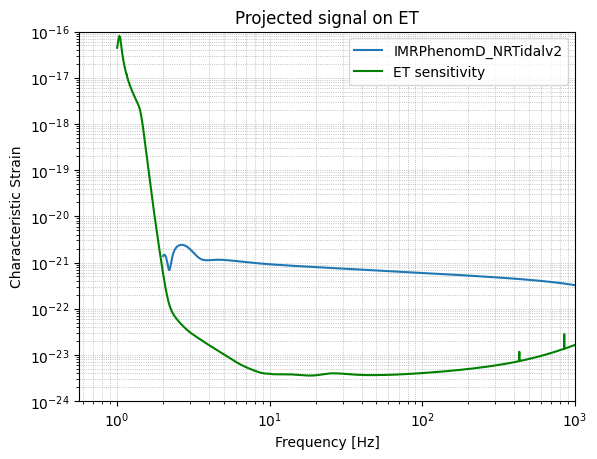

In [7]:
# add the detector's sensitivity curve and plot the characteristic strain
psd_data = gw.utilities.get_detector_psd(detector)
# psd_data is a dictionary with the keys 'frequency' and 'psd'

plt.loglog(frequency, 2 * frequency * np.abs(signal[:, 0]), label='%s' %waveform_model)
plt.loglog(psd_data[:, 0], np.sqrt(psd_data[:, 0] * psd_data[:, 1]), label='%s sensitivity' %detector, color='green')
plt.legend()
plt.ylim(1e-24, 1e-16)
plt.xlim(0, 1e3)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.grid(linestyle='dotted', linewidth='0.6', which='both')
plt.title('Projected signal on %s' %detector)
plt.show()

### Characteristic strain
The characteristic strain is a particular combination of signal/ASD with frequency so that the output is adimensional and the area in between the signal and the detector's densitivity curve can be interpreted as SNR:

$$
SNR^2 = 4\int\frac{h(f)h^*(f)}{S_n}df
$$

Therefore:

$$
h_c = 2f|h| \quad \text{and} \quad S_c = \sqrt{f}\sqrt{PSD}
$$

In [8]:
# Plot the time before the merger as a function of the frequency
_, t_of_f = gw.utilities.get_fd_signal(parameters, detector, waveform_model, f_ref)


#### Time as a function of frequency
$$
t(f) = t_c -\frac{5}{256 \pi^{8/3}} \cdot \frac{1}{\mathcal{M}_c^{5/3}} \cdot \frac{1}{f^{8/3}}
$$


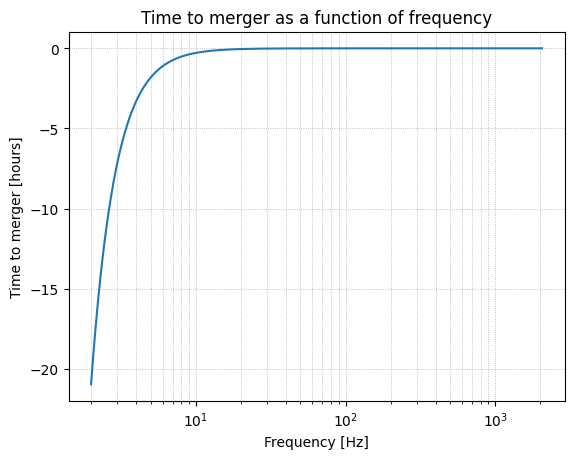

In [9]:
convert_from_seconds_to_hours = 3600
plt.semilogx(frequency, (t_of_f - parameters['geocent_time'].iloc[0]) / convert_from_seconds_to_hours)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Time to merger [hours]')
plt.grid(linestyle='dotted', linewidth='0.6', which='both')
plt.title('Time to merger as a function of frequency')
plt.show()

#### Calculate SNR

In [10]:
# The networks are the combinations of detectors that will be used for the analysis
# The detection_SNR is the minimum SNR for a detection:
#   --> The first entry specifies the minimum SNR for a detection in a single detector
#   --> The second entry specifies the minimum network SNR for a detection
detectors = ['ET', 'CE1', 'LLO', 'LHO', 'VIR']
network = gw.detection.Network(detector_ids = detectors, detection_SNR = (0., 8.))
snr = gw.utilities.get_snr(parameters, network, waveform_model, f_ref)


In [11]:
snr

,ET,CE1,LLO,LHO,VIR,network
event_0,645.005406,1126.071931,85.464941,101.09583,27.422189,1304.740038


### Horizon plots

The horizon distance is the farthest luminosity distance at which a GW source (typically an optimally oriented and located binary system) would produce a signal with an SNR equal to a chosen detection threshold — usually SNR = 8 — in a single detector. It represents another of quick metrics evaluations to assess the performance of a GW detector.

In [12]:
# example event
masses = np.logspace(-0.1, 4, 50)
hor_params = {
        'mass_ratio':1.,
        'theta_jn':0.,
        'psi': 0.,
        'phase': 0.,
        'geocent_time': 1187008882
    }

network = gw.detection.Network(['ET'])
redshifts_snr = []

for mass in tqdm(masses):
    hor_params['chirp_mass_source'] = mass
    opt_parameters = gw.horizon.find_optimal_location(hor_params, network, waveform_model='IMRPhenomD')
    distance, redshift_det = gw.horizon.horizon(opt_parameters, network, target_SNR=8, waveform_model='IMRPhenomD')
    redshifts_snr.append(redshift_det)

100%|██████████| 50/50 [01:35<00:00,  1.92s/it]


In [13]:
# convert from chirp mass and mass ratio to total mass
def chirp_mass_q_to_total_mass(chirp_mass, mass_ratio):
    return chirp_mass * (1 + mass_ratio) ** (3/5) / (1 + mass_ratio ** (3/5))

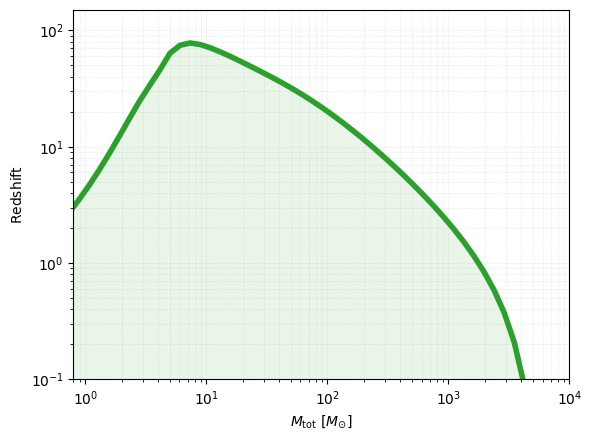

In [40]:
# plot the results: mass vs redshift
plt.loglog(chirp_mass_q_to_total_mass(masses, np.ones_like(masses)), redshifts_snr, color='tab:green', linewidth=4, alpha=1)
# color the space below the curve
plt.fill_between(chirp_mass_q_to_total_mass(masses, np.ones_like(masses)), 0, redshifts_snr, color='tab:green', alpha=0.1)

plt.xlabel(r'$M_{\rm tot}$ $[M_{\odot}]$')
plt.ylabel(r'$\rm Redshift$')
                    
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.25)
plt.ylim(0.1, 150)
plt.xlim(0.8, 10000)
plt.show()

# Parameter estimation
Bayesian gravitational wave data analysis is used to infer the properties of gravitational wave sources and make predictions about their parameters (see below what are in detail the parameters we are talking about). It combines the principles of Bayesian statistics with the analysis of gravitational wave signals detected by ground-based observatories like LIGO and Virgo.

The goal of Bayesian gravitational wave data analysis is to extract this information from the noisy gravitational wave signals detected by the observatories:
$$s(t) = h_0(t) + n(t)$$
where $h_0(t)$ is the true (unknown) signal and $n(t)$ is the detector noise, assumed to be Gaussian and stationary.

Mathematically, Bayes' theorem can be expressed as:

$$p(\vec{\theta}|s) \propto \pi(\vec{\theta})\mathscr{L}(s|\vec{\theta})$$

where $p(\vec{\theta}|d)$ is the posterior distribution, $\mathscr{L}(d|\vec{\theta})$ is the likelihood function, $\pi(\vec{\theta})$ is the prior distribution, and we neglected the evidence or marginal likelihood at the denominator.

To perform Bayesian gravitational wave data analysis, we use various techniques such as Markov Chain Monte Carlo (MCMC) sampling and nested sampling. The mostly used software is `bilby`, and typically full Baysian parameter estimation is computationally expensive.

### Fisher-matrix approximation

The gravitational-wave likelihood is defined as the probability of noise realization:

$$ \mathscr{L}(d|\vec{\theta}) \propto \exp\left[-\frac{1}{2}\langle s - h(\vec{\theta})| s - h(\vec{\theta}) \rangle \right] $$

The inner product $\langle \cdot|\cdot\rangle$ measures the overlap between two signals given the noise characteristics of the detector:

$$ \langle a, b \rangle \equiv 4\operatorname{Re}\int_{f_{\rm min}}^{f_{\rm max}} \frac{\tilde{a}(f)\tilde{b}^*(f)}{S_n(f)}df $$

We can approximate the likelihood by expanding the template around the true signal:

$$ h(\vec{\theta})  = h_0 + \Delta \theta^i h_i$$

so that the likelihood becomes a **multivariarte Gaussian distribution**:

$$ p(\vec{\theta}|s)\propto \pi(\vec{\theta}) \exp\left[-\frac{1}{2}\langle n|n\rangle + \Delta \theta^k\langle n|h_k\rangle - \frac{1}{2}\Delta \theta^i \langle h_i|h_j\rangle \Delta \theta^j \right] $$

1. The truncation in the expansion is done at first-order in partial derivatives, known as **linearized signal approximation** (LSA)
2. LSA approximation is equivalent to the leading term in **posterior expansion as a series in 1/SNR** (this is the reason why Fisher matrix is said to work in high-SNR limit) [see Vallisneri 2008]

In Fisher matrix context we usually work in zero-noise approximation, so that the first two terms cancel and we define the Fisher matrix as:
$$ F_{ij} = \langle h_i|h_j\rangle$$


The Fisher likelihood is therefore simply given by:

$$ \mathscr{L} \propto \exp\left[-\frac{1}{2} \left(\vec{\theta} - \vec{\theta}_{\rm inj}\right)^{\rm T} F \left(\vec{\theta} - \vec{\theta}_{\rm inj}\right) \right] $$

The inverse of the Fisher matrix gives us the covariance matrix among parameters:

$$ \sigma_i = \sqrt{\Sigma_{ii}} \ \leftrightarrow  \Sigma_{ij} = \left[F^{-1}\right]_{ij}$$

This is the basic math behind Fisher matrix codes, like `GWFish`.

## Why Fisher analysis?
**When studying the performance of a new detector, such as the Einstein Telescope, which has a much improved sensitivity and is predicted to detect entire populations of events ($10^6$ events per years against the current tens that we are detecting), we want a tool to make forecasts in a reasonable amoiunt of time. Since we do not have still a fast full parameter estimation, the Fisher matrix approximation is the state-of-the-art for forecasts.** 

### Calculate $1\sigma$ Errors with `GWFish`

The implementation of a Fisher matrix code relies on three main pillars:
1. Analytic **waveform approximation**: `GWFish` uses all the waveforms from `lalsimulation` in frequency domain (although it is also possble to work in time domain)
2. **Derivatives**: these are done numerically at the second order (except for some parameters, like distance, phase and time, which are straightforward analytically)
3. **Matrix inversion**: singular value decomposition and normalization is used to safely invert the Fisher matrix

For a more realistic analysis we can include the **duty cycle** of the detectors using `use_duty_cycle = True`

In [15]:
# The fisher parameters are the parameters that will be used to calculate the Fisher matrix
# and on which we will calculate the errors
fisher_parameters = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'theta_jn', 'dec','ra',
                     'psi', 'phase', 'geocent_time', 'a_1', 'a_2', 'lambda_1', 'lambda_2']

In [16]:
detected, network_snr, parameter_errors, sky_localization = gw.fishermatrix.compute_network_errors(
        network = gw.detection.Network(detector_ids = ['ET'], detection_SNR = (0., 8.)),
        parameter_values = parameters,
        fisher_parameters=fisher_parameters, 
        waveform_model = waveform_model,
        f_ref = 20.,
        )   
        # use_duty_cycle = False, # default is False anyway
        # save_matrices = False, # default is False anyway, put True if you want Fisher and covariance matrices in the output
        # save_matrices_path = None, # default is None anyway,
                                     # otherwise specify the folder
                                     # where to save the Fisher and
                                     # corresponding covariance matrices
    


100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


In [17]:
print('The network SNR of the event is ', network_snr)

The network SNR of the event is  [645.00540645]


In [18]:
print('The sky localization of the event is ', sky_localization)

The sky localization of the event is  [4.75415021e-05]


In [19]:
# Choose percentile factor of sky localization and pass from rad2 to deg2
percentile = 90.
sky_localization_90cl = sky_localization * gw.fishermatrix.sky_localization_percentile_factor(percentile)
sky_localization_90cl

array([0.71872681])

In [20]:
# One can create a dictionary with the parameter errors, the order is the same as the one given in fisher_parameters
parameter_errors_dict = {}
for i, parameter in enumerate(fisher_parameters):
    parameter_errors_dict['err_' + parameter] = np.squeeze(parameter_errors)[i]

print('The parameter errors of the event are ')
parameter_errors_dict

The parameter errors of the event are 


{'err_chirp_mass': 7.72772062478848e-07,
 'err_mass_ratio': 0.012457691886787943,
 'err_luminosity_distance': 2.251713928473747,
 'err_theta_jn': 0.07997827997775477,
 'err_dec': 0.0036304744266439223,
 'err_ra': 0.004552362939462272,
 'err_psi': 0.12334740159080766,
 'err_phase': 0.24840265150763793,
 'err_geocent_time': 9.92535556871366e-05,
 'err_a_1': 0.1748839167388211,
 'err_a_2': 0.21749201995398468,
 'err_lambda_1': 2555.01137110076,
 'err_lambda_2': 4606.837234927146}

#### Save results to file

There is another function ```analyze_and_save_to_txt``` that allows to save the results to a file. The difference with respect to the ```compute_network_errors``` function is that one can pass different network combinations and get results files for each of them. This means that if your detectors list is something like ```['LHO', 'LLO', 'VIR', 'CE1', 'ET']``` and you want to create 3 different networks out of it, i.e. ```['LHO', 'LLO', 'VIR']```, ```['CE1', 'ET']``` and ```['ET']``` alone, then one should inizialize the ```analyze_and_save_to_txt``` function as follows:

```
network = gw.detection.Network(detector_ids = ['LHO', 'LLO', 'VIR', 'CE1', 'ET'], detection_SNR = (0., 8.))
```

and then specify the different network combinations:

```
sub_network_ids_list = [[0, 1, 2], [3, 4], [4]]
```

In [21]:
# create forlder where store results
!mkdir tutorial_results

mkdir: tutorial_results: File exists


In [22]:
data_folder = 'tutorial_results' # the one we just created
network = gw.detection.Network(detector_ids = ['ET'], detection_SNR = (0., 8.))
gw.fishermatrix.analyze_and_save_to_txt(network = network,
                                        parameter_values  = parameters,
                                        fisher_parameters = fisher_parameters, 
                                        sub_network_ids_list = [[0]],
                                        population_name = 'BNS',
                                        waveform_model = waveform_model,
                                        f_ref = 20.,
                                        save_path = data_folder,
                                        save_matrices = True)

100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


In [23]:
fisher_matrix = np.load(data_folder + '/' + 'fisher_matrices_ET_BNS_SNR8.npy')

In [24]:
errors = pd.read_csv(data_folder + '/' + 'Errors_ET_BNS_SNR8.txt', delimiter = ' ')

In [25]:
# One can access all the column names of the errors output file:
errors.keys()

Index(['network_SNR', 'chirp_mass', 'mass_ratio', 'luminosity_distance',
       'theta_jn', 'ra', 'dec', 'psi', 'phase', 'geocent_time', 'a_1', 'a_2',
       'lambda_1', 'lambda_2', 'err_chirp_mass', 'err_mass_ratio',
       'err_luminosity_distance', 'err_theta_jn', 'err_dec', 'err_ra',
       'err_psi', 'err_phase', 'err_geocent_time', 'err_a_1', 'err_a_2',
       'err_lambda_1', 'err_lambda_2', 'err_sky_location'],
      dtype='object')

Same errors as before just save to a .txt file:

In [26]:
errors

,network_SNR,chirp_mass,mass_ratio,luminosity_distance,theta_jn,ra,dec,psi,phase,geocent_time,...,err_dec,err_ra,err_psi,err_phase,err_geocent_time,err_a_1,err_a_2,err_lambda_1,err_lambda_2,err_sky_location
0,645.005406,1.198,0.8309,43.75,2.545,3.446,-0.4081,0.0,0.0,1.187000e+09,...,0.00363,0.004552,0.1233,0.2484,0.000099,0.1749,0.2175,2555.0,4607.0,0.000048


#### A quick test

One would expect that the Fisher matrix entry corresponding to dL-dL should be approximated by the ratio between the SNR and the luminosity distance squared as follows:

$$
\frac{1}{SNR} = \frac{\Delta d_L}{d_L}
$$

where $\Delta d_L = \sqrt{\left[F\right]^{-1}_{d_L,d_L}}$, with $F$ the Fisher matrix.

This can be derived from the fact that $\partial_{d_L}h = -\frac{1}{d_L}h$ and 
$$\frac{1}{\left(\Delta d_L\right)^2} \sim F_{d_L,d_L}=\langle \partial_{d_L}h|\partial_{d_L}h\rangle \sim \frac{SNR^2}{d_L^2}$$

where the inverse of the error on distance is the corresponding entry of the Fisher matrix $F_{d_L,d_L}$ (assuming correlations are negligible).

A rough approximation in literature takes: $\frac{\Delta d_L}{d_L} \sim \frac{2}{SNR}$.

In [27]:
my_fisher = fisher_matrix[0, :, :]
print('We expect Delta dL/dL to scale as 1/SNR')
print('fisher matrix dL-dL: ', my_fisher[2, 2])
print('(SNR/dL)^2: ', (errors['network_SNR'].iloc[0] / errors['luminosity_distance'].iloc[0])**2)

We expect Delta dL/dL to scale as 1/SNR
fisher matrix dL-dL:  217.37978198571082
(SNR/dL)^2:  217.35548047427832


#### Corner plot

Using the covariance matrix one show all the correlations between pairs of parameters in a corner plot. Using as inputs the injected values and the covariance matrix, one samples from a multivariate Gaussian distribution and plot the samples.

In [28]:
CORNER_KWARGS = dict(
    bins = 50, # number of bins for histograms
    smooth = 0.99, # smooths out contours. 
    plot_datapoints = True, # choose if you want datapoints
    label_kwargs = dict(fontsize = 12), # font size for labels
    show_titles = True, #choose if you want titles on top of densities.
    title_kwargs = dict(fontsize = 12), # font size for title
    plot_density = False,
    title_quantiles = [0.16, 0.5, 0.84],  # add quantiles to plot densities for 1d hist
    levels = (1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), # 1, 2 and 3 sigma contours for 2d plots
    fill_contours = True, #decide if you want to fill the contours
    max_n_ticks = 2, # set a limit to ticks in the x-y axes.
    title_fmt=".3f"
    )

In [29]:
corner_lbs = [r'${\mathcal{M}}_{\rm chirp}$ $[M_{\odot}]$', r'$q$', r'$D_{\rm L}$ [Mpc]',
                r'$\iota$ [rad]', r'$DEC$ [rad]', r'$RA$ [rad]', r'$\Psi$ [rad]',
                r'$phase$', r'$t_c$ [s]', r'$a_1$', r'$a_2$', r'$\Lambda_1$', r'$\Lambda_2$']

mean_lbs = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'theta_jn', 'dec', 'ra', 'psi',
            'phase', 'geocent_time', 'a_1', 'a_2', 'lambda_1', 'lambda_2']
mean_values = parameters[mean_lbs].iloc[0] # mean values of the parameters
cov_matrix = np.load(data_folder + '/' + 'inv_fisher_matrices_ET_BNS_SNR8.npy')[0, :, :]

/var/folders/v7/nz73c0sd1r3610zffg1d_w980000gq/T/ipykernel_77095/2349962579.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean_values, cov_matrix, int(1e6))


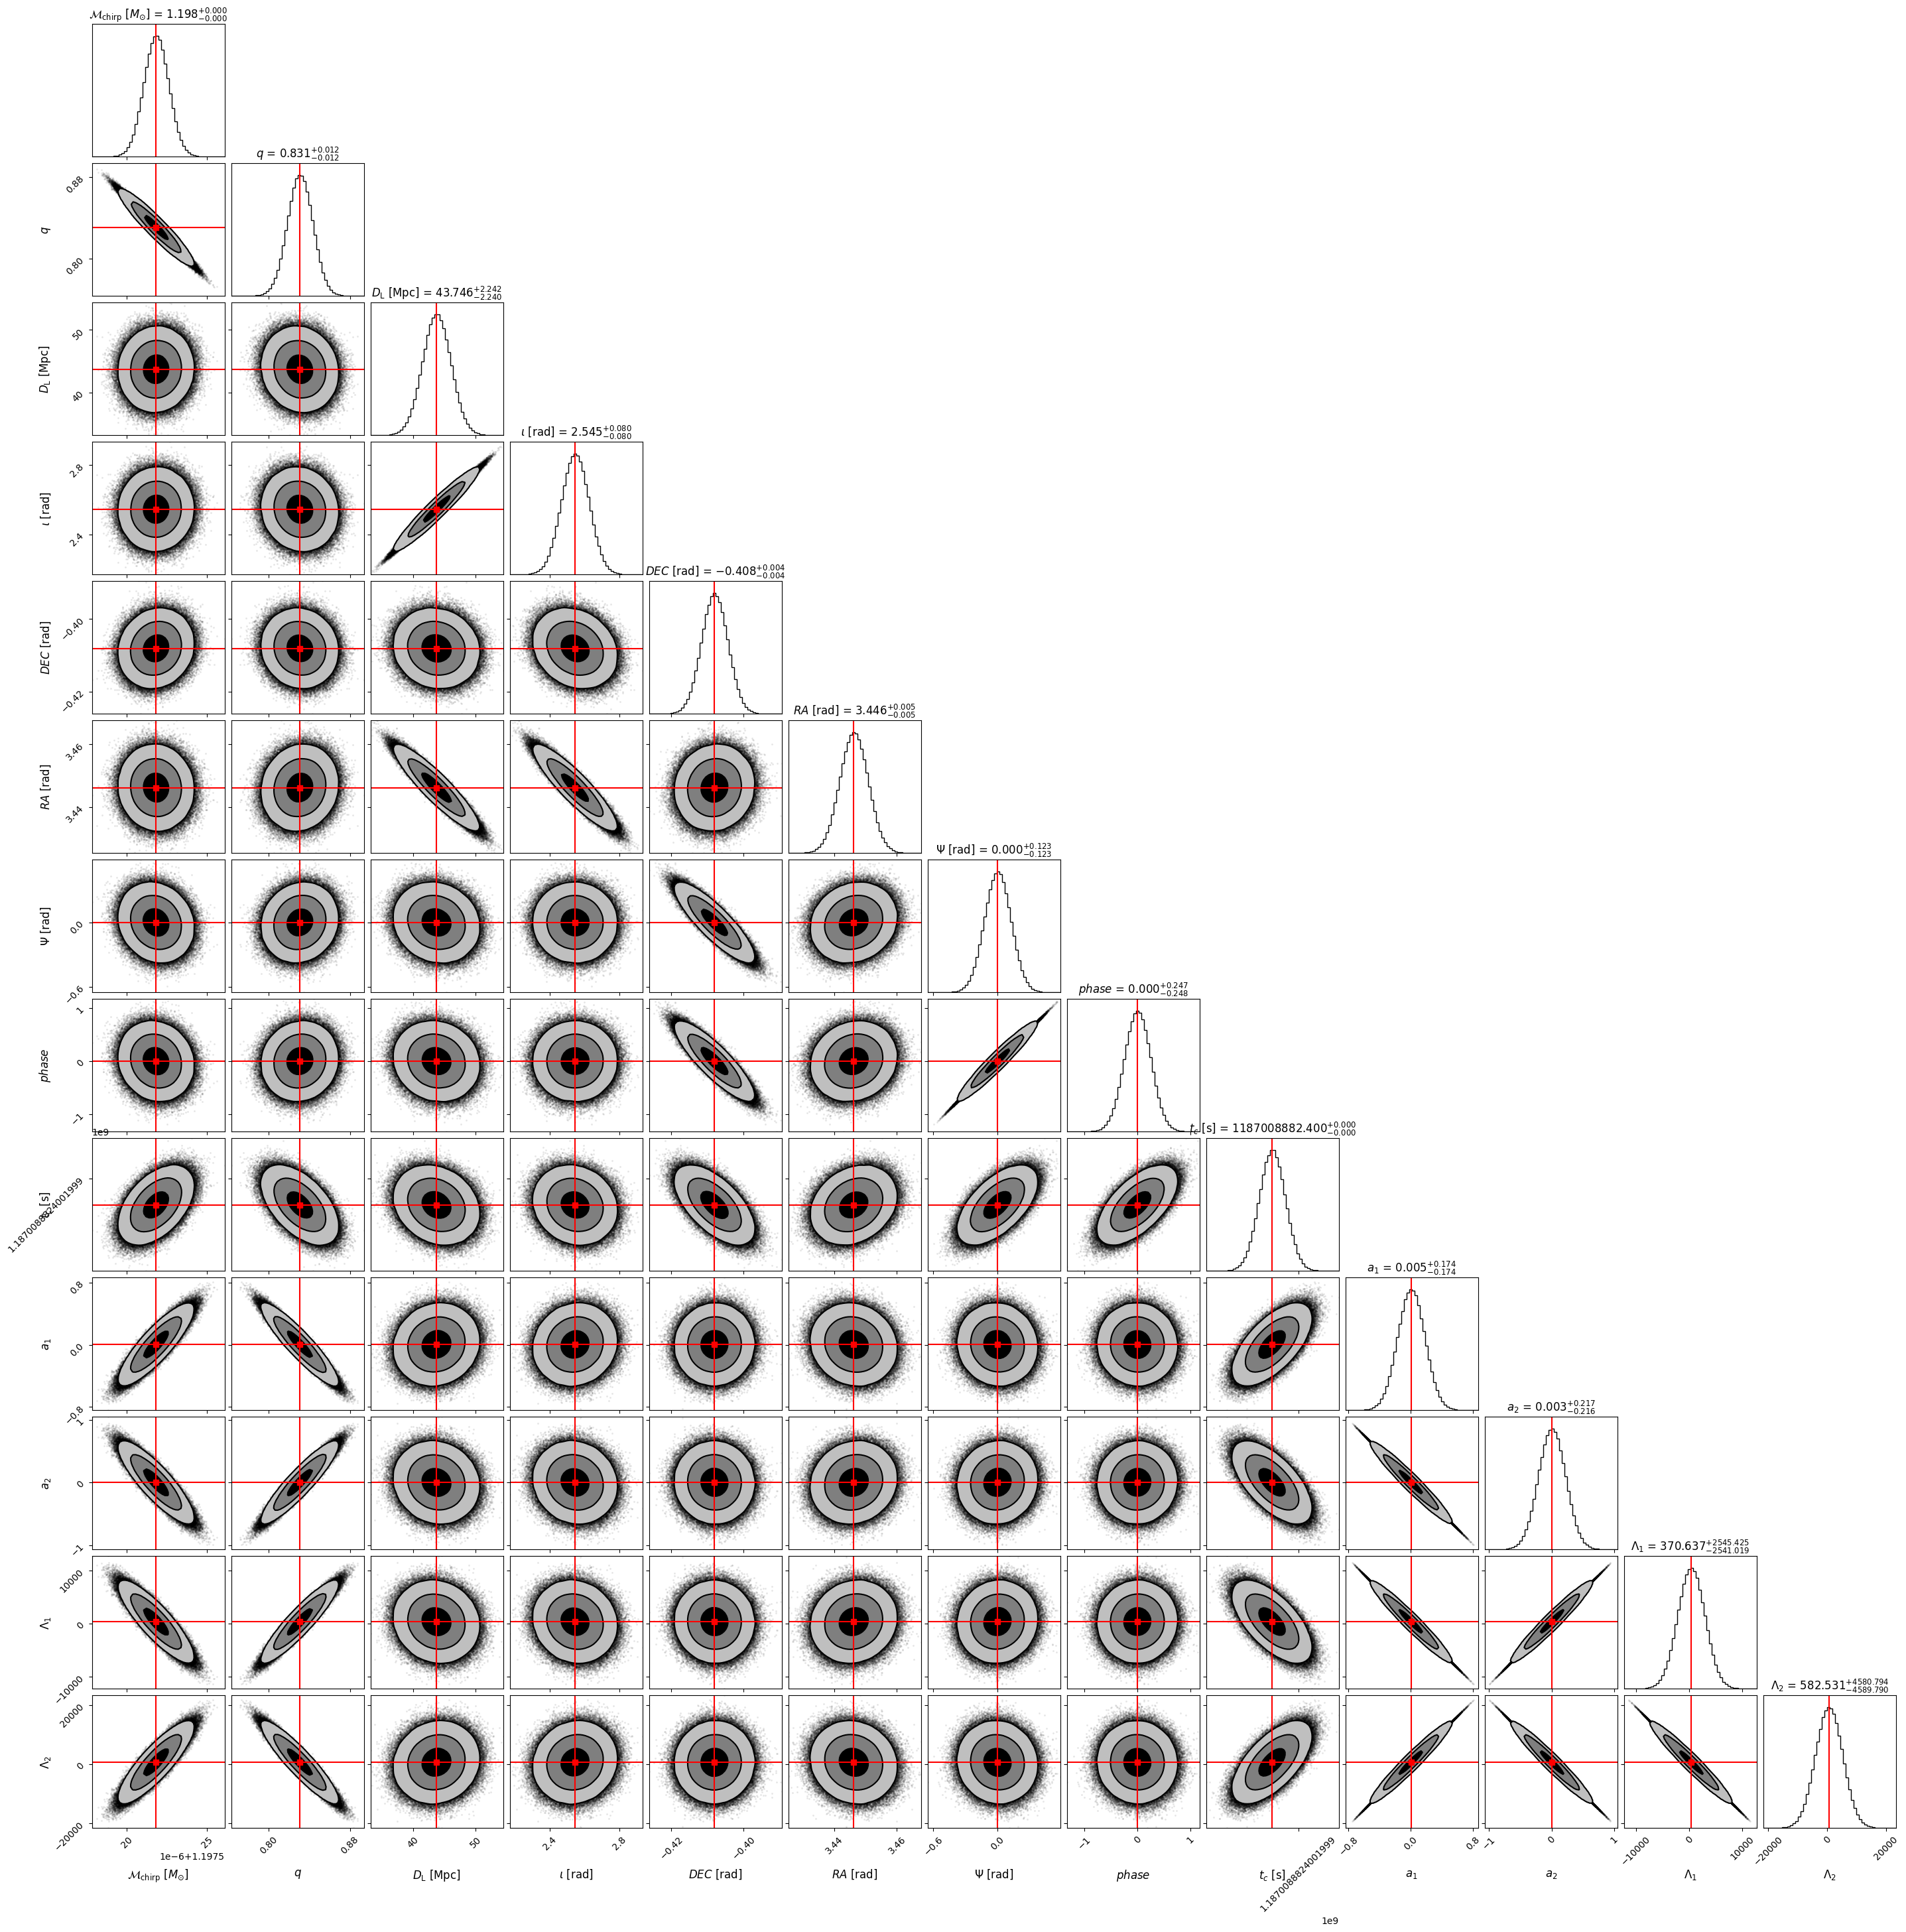

In [30]:
# Sample from a multi-variate gaussian with the given covariance matrix and injected mean values
samples = np.random.multivariate_normal(mean_values, cov_matrix, int(1e6))
fig = corner.corner(samples, labels = corner_lbs, truths = mean_values, truth_color = 'red',
                    **CORNER_KWARGS)
plt.show()

## Some exercises

### 1. Compare waveforms
Take the GW170817-like event we have analyzed so far and try to compare the error estimate using two different waveforms (for example the basic TaylorF2 and the IMRPhenomHM)

### 2. Compare networks
Take our GW17817-like event and compare results using ET alone and the O5-like network composed of LIGO-Hanford (LHO), LIGO Livingston (LLO), Virgo (VIR) and KAGRA (KAG). What happens to sky localization?

# Population Analysis
The functions are the same explained in the previous tutorial, but applied to a population sample instead of a single event

In [31]:
# Example for BNS population
nev = 50 # number of events
my_dict = {}
my_dict['redshift'] = np.random.uniform(0.001, 1, nev)
my_dict['mass_1'] = np.random.uniform(1.1, 2.5, nev)
my_dict['mass_2'] = np.random.uniform(1.1, 2.5, nev)
my_dict['luminosity_distance'] = Planck18.luminosity_distance(my_dict['redshift']).value
my_dict['theta_jn'] = np.arccos(np.random.uniform(-1., 1., nev))
my_dict['ra'] = np.random.uniform(0., 2 * np.pi, nev)
my_dict['dec'] = np.arcsin(np.random.uniform(-1., 1., nev))
my_dict['psi'] = np.random.uniform(0., np.pi, nev)
my_dict['phase'] = np.random.uniform(0., 2 * np.pi, nev)
my_dict['geocent_time'] = np.random.uniform(1577491218, 1609027217, nev)
my_dict['a_1'] = np.random.uniform(0., 0.1, nev)
my_dict['a_2'] = np.random.uniform(0., 0.1, nev)


aux_mass = my_dict['mass_1'] # sort the two masses so that m1>m2
my_dict['mass_1'] = np.maximum(aux_mass, my_dict['mass_2'])
my_dict['mass_2'] = np.minimum(aux_mass, my_dict['mass_2'])
my_pop = pd.DataFrame(my_dict)
my_pop.head(5)

,redshift,mass_1,mass_2,luminosity_distance,theta_jn,ra,dec,psi,phase,geocent_time,a_1,a_2
0,0.397525,2.457119,1.580578,2223.873309,1.994814,0.703673,-0.123469,1.470113,3.497005,1.582221e+09,0.034474,0.039612
1,0.364649,1.898618,1.107292,2009.707932,0.241289,1.983892,0.048312,0.516199,0.127697,1.585348e+09,0.007530,0.006747
2,0.586406,1.456030,1.369475,3536.517024,2.376418,2.034297,0.301254,0.194531,1.696999,1.606453e+09,0.037446,0.012679
3,0.085470,1.502460,1.246003,402.751883,0.556537,6.055871,-0.763797,1.724124,2.592731,1.588943e+09,0.002132,0.077546
4,0.199631,2.393272,2.039022,1010.212098,0.568828,2.168590,0.003696,1.220204,1.674092,1.582122e+09,0.031320,0.084905


In [32]:
detectors_pop = ['ET']
network_pop = gw.detection.Network(detector_ids = detectors_pop, detection_SNR = (0., 8.))
waveform_model_pop = 'IMRPhenomHM'
fisher_parameters_pop = ['mass_1', 'mass_2', 'luminosity_distance', 'theta_jn', 'dec','ra',
                     'psi', 'phase', 'geocent_time', 'a_1', 'a_2']

In [33]:
!mkdir pop_gwfish_results

In [34]:
data_folder_pop = 'pop_gwfish_results'
gw.fishermatrix.analyze_and_save_to_txt(network = network_pop,
                                        parameter_values  = my_pop,
                                        fisher_parameters = fisher_parameters_pop, 
                                        sub_network_ids_list = [[0]],
                                        population_name = 'BNS_POP',
                                        waveform_model = waveform_model_pop, # if no f_ref is passed, the code will use the default value of 50 Hz
                                        save_path = data_folder_pop,
                                        save_matrices = False)

100%|██████████| 50/50 [00:30<00:00,  1.65it/s]


In [35]:
pop_errors = pd.read_csv(data_folder_pop + '/' + 'Errors_ET_BNS_POP_SNR8.txt', delimiter = ' ')
pop_errors.head(5)

,network_SNR,redshift,mass_1,mass_2,luminosity_distance,theta_jn,ra,dec,psi,phase,...,err_luminosity_distance,err_theta_jn,err_dec,err_ra,err_psi,err_phase,err_geocent_time,err_a_1,err_a_2,err_sky_location
0,14.180438,0.39750,2.457,1.581,2224.0,1.9950,0.7037,-0.123500,1.4700,3.4970,...,2803.0,0.2631,1.33700,0.67380,0.3249,1.373,0.018850,1.2910,2.1270,2.508000
1,18.777102,0.36460,1.899,1.107,2010.0,0.2413,1.9840,0.048310,0.5162,0.1277,...,784.6,1.2690,0.08884,0.16070,169.0000,338.000,0.003290,0.8096,1.5120,0.036110
2,12.833440,0.58640,1.456,1.369,3537.0,2.3760,2.0340,0.301300,0.1945,1.6970,...,3490.0,0.6662,1.73200,0.76290,1.2570,3.422,0.015150,4.4080,4.7520,3.711000
3,81.025249,0.08547,1.502,1.246,402.8,0.5565,6.0560,-0.763800,1.7240,2.5930,...,143.9,0.5438,0.04349,0.05732,1.3130,2.745,0.000715,0.2157,0.2713,0.005489
4,38.260586,0.19960,2.393,2.039,1010.0,0.5688,2.1690,0.003696,1.2200,1.6740,...,887.3,1.4370,0.07544,0.05196,4.8670,9.808,0.001551,0.4697,0.5722,0.011400


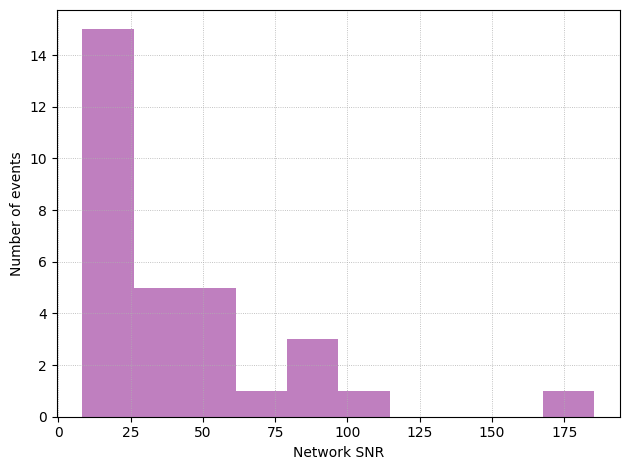

In [36]:
plt.hist(pop_errors['network_SNR'], bins = 10, color = 'purple', alpha = 0.5, linewidth = 2)
plt.xlabel('Network SNR')
plt.ylabel('Number of events')
plt.grid(linestyle='dotted', linewidth='0.6', which='both')
plt.tight_layout()
plt.show()

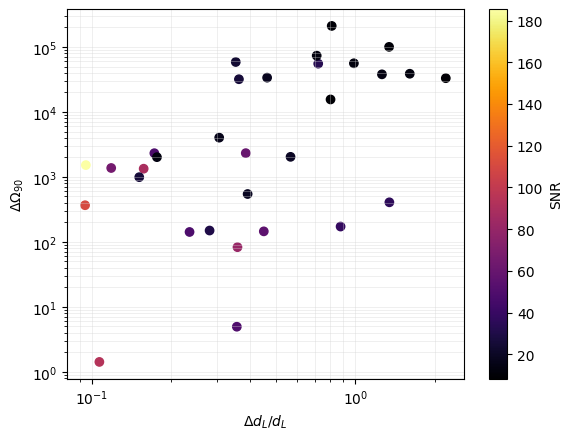

In [37]:
percentile_pop = 90
sky_loc_90cl_pop = pop_errors['err_sky_location'] * gw.fishermatrix.sky_localization_percentile_factor(percentile_pop)
sc = plt.scatter(pop_errors['err_luminosity_distance'] / pop_errors['luminosity_distance'],
                 sky_loc_90cl_pop, c = pop_errors['network_SNR'], cmap = 'inferno')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta d_L/d_L$')
plt.ylabel('$\Delta \Omega_{%s}$' %int(percentile))
plt.colorbar(sc, label = 'SNR')
plt.grid(which = 'both', color = 'lightgray', alpha = 0.5, linewidth = 0.5)
plt.show()